<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/logreg_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/penguins.csv")

In [3]:
df['species'] = df.species.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df['island'] = df.island.replace({'Biscoe':0, 'Dream':1, 'Torgersen':2})
df['sex'] = df.sex.replace({'male':0, 'female':1, 'NA':2})

<ipython-input-3-3c10aee48c28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df.species.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
<ipython-input-3-3c10aee48c28>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['island'] = df.island.replace({'Biscoe':0, 'Dream':1, 'Torgersen':2})
<ipython-input-3-3c10aee48c28>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [4]:
train_set, test_set= train_test_split(df, test_size=0.2)

In [5]:
train_set = train_set[['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
test_set = test_set[['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]

In [6]:
X_train = train_set[['species', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y_train = train_set['island']
X_test = test_set[['species', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y_test = test_set['island']

In [7]:
num_attributes = X_train.select_dtypes( include = ['float64','int64']).columns
## This might be empty!? ##
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [8]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [23]:
logpipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', lr)])

In [24]:
logpipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('clf', LogisticRegression())])

In [25]:
logpredictions = logpipeline.predict(X_test)

In [26]:
logpredictions

array([1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 1, 1])

In [27]:
logpipeline.score(X_test, y_test)

0.7391304347826086

In [45]:
confusion_matrix(y_test, logpredictions)

array([[28,  6,  2],
       [ 1, 20,  3],
       [ 1,  5,  3]])

In [28]:
accuracy_score(y_test, logpredictions)

0.7391304347826086

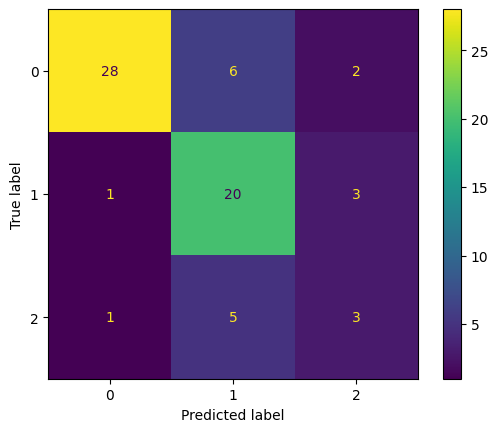

In [31]:
ConfusionMatrixDisplay.from_estimator(logpipeline, X_test, y_test)

# Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
SVM = SVC()

In [38]:
svmpipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', SVM)])

In [39]:
svmpipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('clf', SVC())])

In [40]:
svmpredictions = svmpipeline.predict(X_test)

In [41]:
svmpredictions

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1])

In [42]:
accuracy_score(y_test, svmpredictions)

0.7101449275362319

In [47]:
confusion_matrix(y_test, svmpredictions)

array([[26, 10,  0],
       [ 0, 23,  1],
       [ 0,  9,  0]])

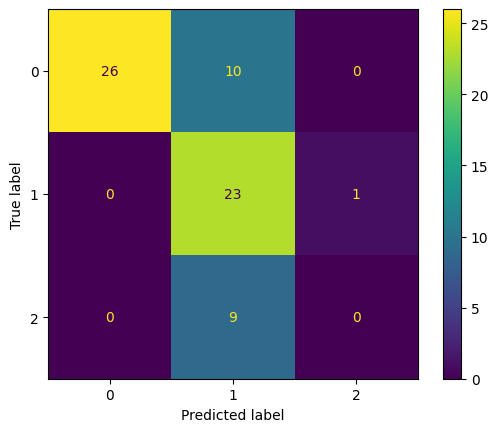

In [48]:
ConfusionMatrixDisplay.from_estimator(svmpipeline, X_test, y_test)